In [210]:
%matplotlib inline
import sys
sys.path.append("..")

import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
from utils.average_spectra import average_dataframe
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (12, 6)

In [211]:
spectra_14 = pd.read_csv("../data/Unprocessed/2017-04-14.csv")
spectra_28 = pd.read_csv("../data/Unprocessed/2017-04-28.csv")
spad_14 = pd.read_csv("../data/Chlorophyll/2017-04-14.csv", header=None)
spad_28 = pd.read_csv("../data/Chlorophyll/2017-04-28_rm_missing.csv", header=None)

In [212]:
print(spectra_14.shape, spectra_28.shape)

(751, 741) (751, 701)


In [213]:
def preprocess_spectra(df):
    return average_dataframe(df, 20).drop("Wavelengths", 1).as_matrix()

#### 301-320 spectra was an error

In [214]:
spectra_14_cleaned = spectra_14.drop(spectra_14.columns[range(301, 321)], axis=1)
spectra_14_cleaned.columns[[300, 301]]

Index(['SL14041700300.asd', 'SL14041700321.asd'], dtype='object')

In [215]:
spectra = np.zeros((71, 751))
spectra[:36] = preprocess_spectra(spectra_14_cleaned).T
spectra[36:] = preprocess_spectra(spectra_28).T

In [216]:
spad = np.concatenate((spad_14.as_matrix(), spad_28.as_matrix()), axis=0)
print(spectra.shape, spad.shape)

(71, 751) (71, 1)


In [217]:
X, y = shuffle(spectra, spad)
X_valid, y_valid = X[:10], y[:10]
X_train, y_train = X[10:], y[10:]

### Training Error

In [218]:
reg = LinearRegression()
reg.fit(X_train, y_train)
mean_absolute_error(reg.predict(X_train), y_train)

2.6389091276467328e-13

### Validation Error

In [219]:
mean_absolute_error(reg.predict(X_valid), y_valid)

6.8949059453090316

### Plot SPAD distribution and standard deviation

7.7026388149354714

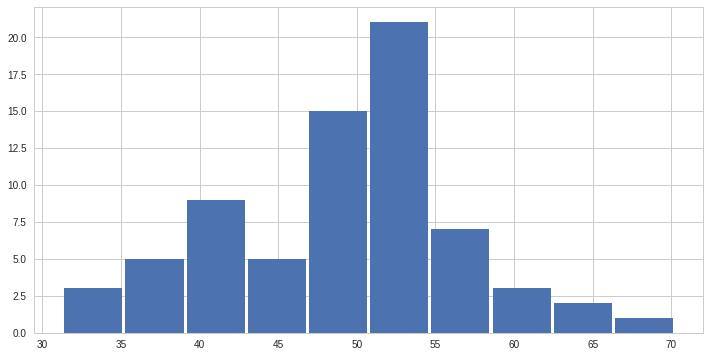

In [220]:
plt.hist(spad, 10, rwidth=0.95)
np.std(spad)

We see that the MAE from the model is close to the standard deviation of the SPAD values.
At this point it seems that the model is not doing better than learning the distribution of the SPAD values.

Possible explanations:
- Model is overfitting so we need more data.
- The spectroradiometer is capturing many leaves while the SPAD is taken from only a few.
- The spectroradiometer is incapable of capturing the same information as the chlorophyll meter.
- There is a range of error from the devices.